# Research into the causes of losses at Procrastinate Pro+

**Brief description:** there is an entertainment application called Procrastinate Pro+. Huge investments have been made in advertising, but the company is still losing money.

There is data on users attracted from May 1 to October 27, 2019:
- server log with data about their visits,
- unloading their purchases for this period,
- advertising expenses.

**Project goal:** to understand the reasons and help the company gain profit.

**Description of data:**

Structure *visits_info_short.csv*:

- ```User Id``` - unique user identifier,
- ```Region``` — user country,
- ```Device``` — user device type,
- ```Channel``` — identifier of the transition source,
- ```Session Start``` — date and time of the start of the session,
- ```Session End``` — date and time of the end of the session.

Structure *orders_info_short.csv*:
- ```User Id``` - unique user identifier,
- ```Event Dt``` - date and time of purchase,
- ```Revenue``` — order amount.

Structure *costs_info_short.csv*:
- ```dt``` — date of the advertising campaign,
- ```Channel``` — identifier of the advertising source,
- ```costs``` — expenses for this campaign.

**Work plan:**

1. Loading and studying data
2. Data preprocessing
3. Exploratory analysis
4. Research your marketing spend
5. Evaluate the return on advertising.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

## Loading and exploring data

In [2]:
try:
    visits = pd.read_csv('.\\datasets\\visits_info_short.csv')
    orders = pd.read_csv('.\\datasets\\orders_info_short.csv')
    costs = pd.read_csv('.\\datasets\\costs_info_short.csv')
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [5]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


The data was downloaded and pre-examined.

The data columns in the tables are incorrect, and some columns have the wrong data type. There are no gaps in the data.

Need to fix:
- column names,
- data type of some columns.

It is also necessary to check the data for duplicates.

## Data preprocessing

### Column names

In [9]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [10]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [11]:
costs.columns = costs.columns.str.lower().str.replace(' ', '_')
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

The column names have been corrected.

### Data types

In the visits table, you need to cast the ```session_start``` and ```session_end``` columns to datetime data type.

In [12]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In the orders table, you need to cast the ```event_dt``` column to a datetime data type.

In [13]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In the costs table, we will create a new column called full_dt from the ```dt``` column of type datetime, and the dt column itself will become the date value from the full_dt column.

In [14]:
costs['full_dt'] = pd.to_datetime(costs['dt'])
costs['dt'] = costs['full_dt'].dt.date
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   object        
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
 3   full_dt  1800 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 56.4+ KB


All incorrect column data types have been corrected.

### Check for duplicates

In [15]:
visits.duplicated().sum()

0

In [16]:
orders.duplicated().sum()

0

In [17]:
costs.duplicated().sum()

0

No obvious duplicates were identified in the tables.

Let's see if there are any implicit ones.

In [18]:
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [19]:
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [20]:
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [21]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

No implicit duplicates were also identified.

**Mini-conclusion:** in the process of data preprocessing the following was done:
- the names of the columns have been corrected,
- column data types have also been corrected,
- tables were checked for duplicates.

## Preparing functions

### User profile creation feature

In [22]:
def get_profiles(sessions, orders, ad_costs):
    # find the parameters of the first visits
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg({
            'session_start': 'first',
            'channel': 'first',
            'device': 'first',
            'region': 'first'
        })
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    
    # determine the date and month of the first visit
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].dt.to_period('M').dt.to_timestamp().dt.date
    
    # add a sign of paying users
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # count the number of unique users
    # with the same source and date of attraction
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # we combine spending on advertising and the number of attracted users
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # let's find out how much money was spent on attracting a user
    # on a specific date from a specific channel
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # add acquisition cost to profiles
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left'
    )
    
    # the cost of acquiring organic users is zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles

### Function for calculating retention

In [23]:
def get_retention(profiles, sessions, observation_date,
                  horizon_days, dimensions=[], ignore_horizon=False):
    
    # add a payer column for grouping
    dimensions = ['payer'] + dimensions
    
    # exclude users who have not “lived” to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # collecting “raw” data to calculate retention
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
    
    # function for grouping the table according to the desired characteristics
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    
    # get the retention table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # get a table of retention dynamics
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    return result_raw, result_grouped, result_in_time

### Function for calculating conversion

In [24]:
def get_conversion(profiles, purchases, observation_date, horizon_days,
                  dimensions=[], ignore_horizon=False):
    
    # exclude users who have not “lived” to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_aqcuisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # determine the date and time of the first purchase for each user
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )
    
    # add purchase data to profiles
    result_raw = result_raw.merge(first_purchases[['user_id', 'event_dt']], on='user_id', how='left')
    
    # we calculate life time for each purchase
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days
    
    # group by cohort if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
        
    # function for grouping the table according to the desired characteristics
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        # get conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    
    # get the conversion table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # for the conversion dynamics table, remove 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []
        
    # get a table of conversion dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    
    return result_raw, result_grouped, result_in_time

### Function for calculating LTV and ROI

In [25]:
def get_ltv(profiles, purchases, observation_date, horizon_days,
           dimensions=[], ignore_horizon=False):
    
    # Exclude users who did not "survive" until the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # Add purchase data to profiles
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    
    # Calculate user lifetime for each purchase
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days
    
    # Group by cohort if no dimensions are specified
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
        
    # Function for grouping by desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        
        # Find cumulative revenue
        result = result.fillna(0).cumsum(axis=1)
        
        # Calculate cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        # Calculate LTV: divide each "cell" in the row by cohort size
        result = result.div(result['cohort_size'], axis=0)
        
        # Exclude all lifetimes exceeding the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        
        # Build a dataframe with user data and CAC values, adding parameters from dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # Calculate average CAC for dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # Calculate ROI: divide LTV by CAC
        roi = result.div(cac['cac'], axis=0)

        # Remove rows with infinite ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        
        # Restore cohort sizes in the ROI table
        roi['cohort_size'] = cohort_sizes
        
        # Add CAC to the ROI table
        roi['cac'] = cac['cac']
        
        # Keep only necessary columns
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        
        return result, roi
    
    # Get LTV and ROI tables
    result_grouped, roi_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # Remove 'cohort' from dimensions for dynamic tables
    if 'cohort' in dimensions:
        dimensions = []
        
    # Get dynamic LTV and ROI tables
    result_in_time, roi_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    return (
        result_raw, 
        result_grouped,
        result_in_time,
        roi_grouped,
        roi_in_time
    )

### Функция для сглаживания фрейма

In [26]:
def filter_data(df, window):
    # apply a moving average for each column
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

### Функция для визуализации удержания

In [27]:
def plot_retention(retention, retention_history, horizon, window=7):
    plt.figure(figsize=(15, 10))
    retention = retention.drop(columns=['cohort_size', 0])
    
    # Keep only the specified lifetime in the dynamic table
    retention_history = retention_history.drop(columns=['cohort_size'])[[horizon-1]]
    
    # If the retention index contains only 'payer', add the second feature - cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])
        
    # In the plot table, there are two columns and two rows, four cells in total
    # In the first cell, plot retention curves for paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of paying users')
    
    # In the second cell, plot retention curves for non-paying users
    # Vertical axis is shared with the plot in the first cell
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of non-paying users')
    
    # In the third cell, plot the dynamics of retention for paying users
    ax3 = plt.subplot(2, 2, 3)
    
    # Get column names for the pivot table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]

    # Filter the data and plot the graph
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition Date')
    plt.title(f'Retention dynamics of paying users on day {horizon}')
    
    # In the fourth cell, plot the dynamics of retention for non-paying users
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Acquisition Date')
    plt.title(f'Retention dynamics of non-paying users on day {horizon}')
    
    plt.tight_layout()
    plt.show()

### Function for visualizing conversion

In [28]:
def plot_conversion(conversion, conversion_history, horizon, window=7):
    plt.figure(figsize=(15, 5))
    conversion = conversion.drop(columns=['cohort_size'])
    conversion_history = conversion_history.drop(columns=['cohort_size'])[[horizon-1]]
    
    # First plot - conversion curves
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('User Conversion')
    
    # Second plot - conversion dynamics
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        name
        for name in conversion_history.index.names
        if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition Date')
    plt.title(f'User Conversion Dynamics on Day {horizon}')
    
    plt.tight_layout()
    plt.show()

### Function for visualizing LTV and ROI

In [29]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
    plt.figure(figsize=(20, 10))
    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    
    # Record acquisition cost in a separate frame
    cac_history = roi_history[['cac']]
    
    # Exclude cohort sizes and CAC from the roi table
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[[horizon - 1]]
    
    # First plot - ltv curves
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')
    
    # Second plot - ltv dynamics
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [
        name
        for name in ltv_history.index.names
        if name not in ['dt']
    ]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition Date')
    plt.title(f'LTV Dynamics on Day {horizon}')
    
    # Third plot - cac dynamics
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [
        name
        for name in cac_history.index.names
        if name not in ['dt']
    ]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition Date')
    plt.title(f'Acquisition Cost Dynamics')
    
    # Fourth plot - roi curves
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Break-even Point')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')
    
    # Fifth plot - roi dynamics
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [
        name
        for name in roi_history.index.names
        if name not in ['dt']
    ]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Break-even Point')
    plt.xlabel('Acquisition Date')
    plt.title(f'ROI Dynamics on Day {horizon}')
    
    plt.tight_layout()
    plt.show()

## Exploratory analysis

### Create user profiles

In [30]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [31]:
min_date_acquisition = profiles['dt'].min()
max_date_acquisition = profiles['dt'].max()
print(min_date_acquisition, max_date_acquisition)

2019-05-01 2019-10-27


User profiles were created and the maximum (2019-10-27) and minimum (2019-05-01) dates for attracting users were determined.

### User countries

Let's create functions to create tables and graphs to display the number of users by attribute and the share of paying users by this attribute.

In [32]:
# function to create a table by attribute
def get_inf_count_by_dimension(profiles, dim):
    count_profiles_by_dim = (
        profiles.groupby(dim)['user_id'].count()
        .reset_index()
        .rename(columns={'user_id': 'all_users'})
        .merge(
            profiles.query('payer == True').groupby(dim)['user_id'].count()
            .reset_index().rename(columns={'user_id': 'payers_users'}), on=dim
        )
        .set_index(dim)
    )
    count_profiles_by_dim['percent_payers'] = count_profiles_by_dim['payers_users'] * 100 / count_profiles_by_dim['all_users']
    return count_profiles_by_dim

In [33]:
# function to create a graph with the number of users
def plot_count_user(table, title, param):
    (
        table[['all_users', 'payers_users']].sort_values(by=['all_users'], ascending=False)
        .plot(kind='bar', grid=True,
              title=title,
              xlabel=param, ylabel='Number of users', figsize=(8, 6)
             )
    )

In [34]:
# function to create a graph with the share of paying users
def plot_percent_payer_user(table, title, param):
    table['percent_payers'].sort_values(ascending=False).plot(
        kind='bar', grid=True, xlabel=param, ylabel='Percent (%)',
        title=title
    )

In [35]:
count_profiles_by_region = get_inf_count_by_dimension(profiles, 'region')
count_profiles_by_region

,all_users,payers_users,percent_payers
region,,,
France,17450,663,3.799427
Germany,14981,616,4.111875
UK,17575,700,3.982930
United States,100002,6902,6.901862


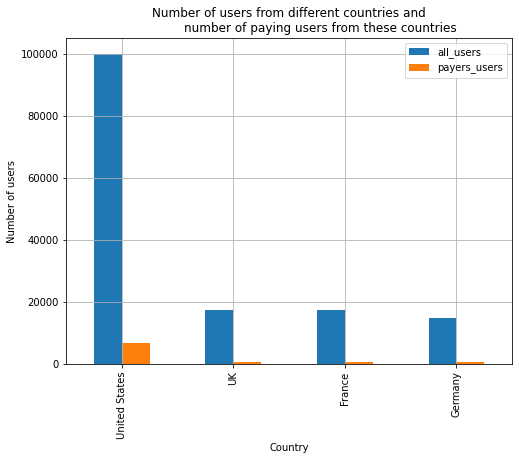

In [36]:
plot_count_user(count_profiles_by_region,
                '''Number of users from different countries and
                number of paying users from these countries''', 'Country')

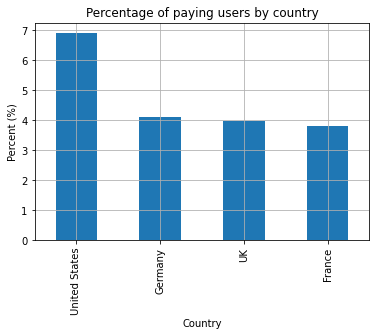

In [37]:
plot_percent_payer_user(count_profiles_by_region,
                       'Percentage of paying users by country', 'Country')

Based on the resulting table and graphs, you can see that the majority of users are from America.

The percentage of paying users in relation to the number of users from the country is also the largest in America, almost 7%; in the UK, Germany and France the percentage of paying users is smaller, about 4%.

### User devices

In [38]:
count_profiles_by_device = get_inf_count_by_dimension(profiles, 'device')
count_profiles_by_device

,all_users,payers_users,percent_payers
device,,,
Android,35032,2050,5.851793
Mac,30042,1912,6.364423
PC,30455,1537,5.046790
iPhone,54479,3382,6.207897


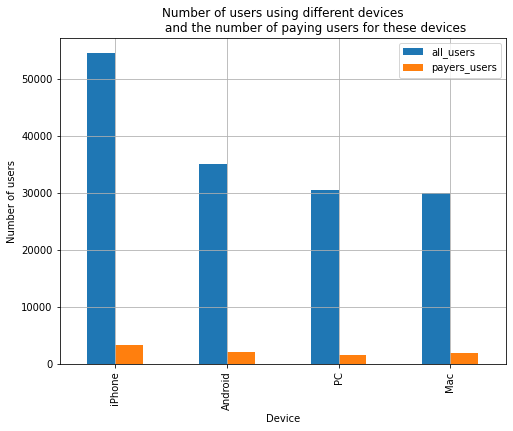

In [39]:
plot_count_user(count_profiles_by_device,
                '''Number of users using different devices
                 and the number of paying users for these devices''', 'Device')

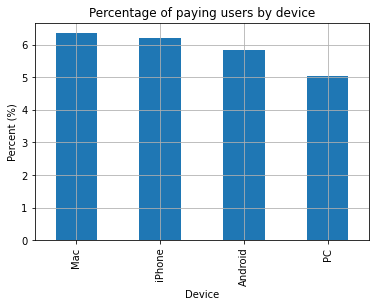

In [40]:
plot_percent_payer_user(count_profiles_by_device,
                       'Percentage of paying users by device', 'Device')

According to the data obtained, you can see that most users come from devices such as iPhones, and the least from Mac devices.

The largest share of paying users comes from devices such as Mac and iPhone, with each device having a percentage of paying users of just over 6%. The smallest share of paying users is on a PC device, about 5%.

### User advertising sources

In [41]:
count_profiles_by_channel = get_inf_count_by_dimension(profiles, 'channel')
count_profiles_by_channel

,all_users,payers_users,percent_payers
channel,,,
AdNonSense,3880,440,11.340206
FaceBoom,29144,3557,12.204914
LeapBob,8553,262,3.063253
MediaTornado,4364,156,3.574702
OppleCreativeMedia,8605,233,2.707728
RocketSuperAds,4448,352,7.913669
TipTop,19561,1878,9.600736
WahooNetBanner,8553,453,5.296387
YRabbit,4312,165,3.826531


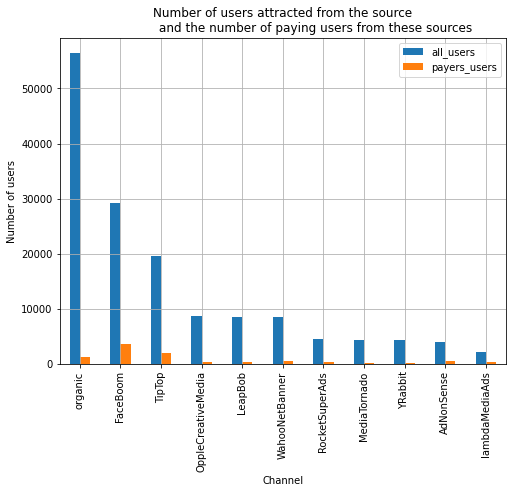

In [42]:
plot_count_user(count_profiles_by_channel,
                '''Number of users attracted from the source
                 and the number of paying users from these sources''', 'Channel')

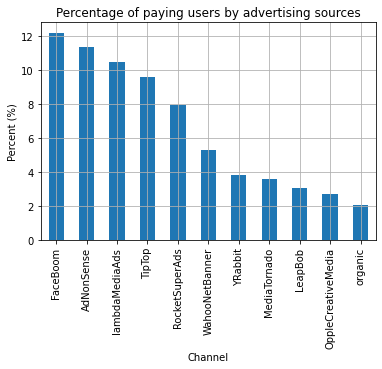

In [43]:
plot_percent_payer_user(count_profiles_by_channel,
                       'Percentage of paying users by advertising sources', 'Channel')

Most users come on their own, from an organic source; in second and third place are the FaceBoom and TipTop platforms. The least number of users comes from the lambdaMediaAds platform.

The largest share of paying users comes from the Faceboom, AdNonSense, and lambdaMediaAds platforms. The worst way for users to convert into paying users is from an organic source.

### Mini-output

- maximum date for attracting users - ```2019-10-27```;
- the minimum date for attracting users is ```2019-05-01```;
- most users are from America;
- a large share of paying users from America;
- Most users use iPhone;
- a large share of paying users use Mac;
- most users came from an organic source;
- a large share of paying users on the FaceBoom platform.

## Marketing

### Marketing expenses

In [44]:
f"Total spent on marketing: {round(costs['costs'].sum(), 2)}"

'Total spent on marketing: 105497.3'

Let's see how much money was spent on each advertising channel.

In [45]:
costs_market = costs.groupby('channel').agg({'costs': 'sum'})
costs_market['percent (%)'] = round(costs_market['costs'] * 100 / costs_market['costs'].sum(), 2)
costs_market = costs_market.sort_values(by='costs', ascending=False)
costs_market

,costs,percent (%)
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


<Axes: title={'center': 'Amount of money spent on each advertising channel'}, xlabel='Channel', ylabel='Costs'>

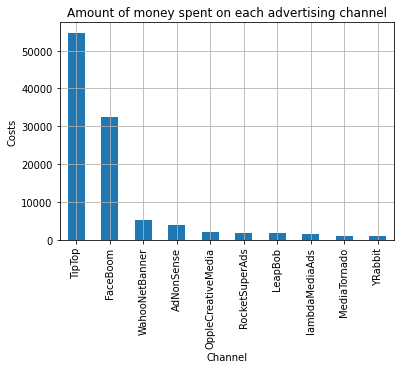

In [46]:
(
    costs_market['costs']
    .plot(kind='bar', grid=True,
          xlabel='Channel', ylabel='Costs',
          title='Amount of money spent on each advertising channel'
         )
)

According to the resulting graph, you can see that the largest expenses are on the TipTop and FaceBoom platforms.

Let's consider the dynamics of changes in expenses for various sources in the context of weeks and months.

First, let's create the new required columns.

In [47]:
costs['month'] = costs['full_dt'].dt.month
costs['week'] = costs['full_dt'].dt.isocalendar().week
costs.head()

,dt,channel,costs,full_dt,month,week
0,2019-05-01,FaceBoom,113.3,2019-05-01,5,18
1,2019-05-02,FaceBoom,78.1,2019-05-02,5,18
2,2019-05-03,FaceBoom,85.8,2019-05-03,5,18
3,2019-05-04,FaceBoom,136.4,2019-05-04,5,18
4,2019-05-05,FaceBoom,122.1,2019-05-05,5,18


Next, we will build graphs by week.

<Axes: title={'center': 'Dynamics of expenses by week for various advertising channels'}, xlabel='Week', ylabel='Costs'>

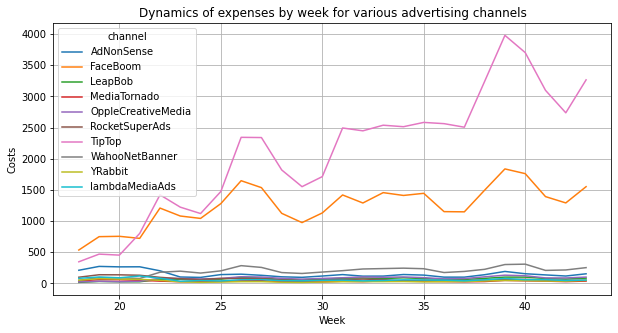

In [48]:
costs.pivot_table(
    index='week', columns='channel', values='costs', aggfunc='sum'
).plot(kind='line', figsize=(10, 5), grid=True,
       xlabel='Week', ylabel='Costs',
       title='Dynamics of expenses by week for various advertising channels'
      )

Based on the resulting graph, you can identify a trend toward an increase in expenses over time and identify the leaders in expenses, as the graph above showed - these are TipTop and FaceBoom.

Let's look at the chart for each platform separately.

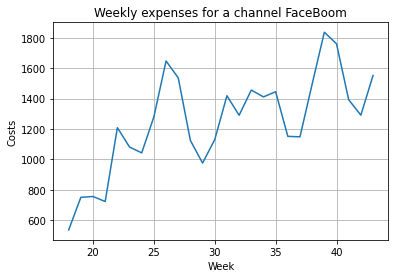

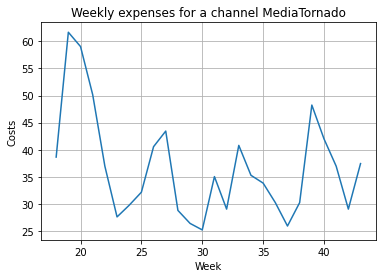

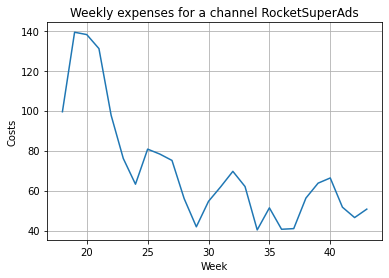

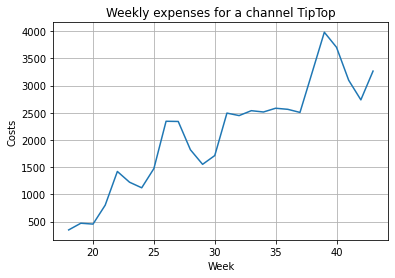

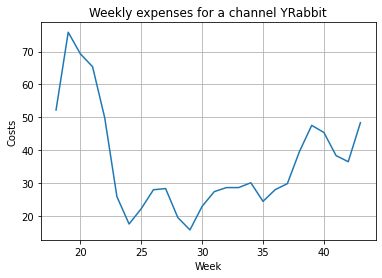

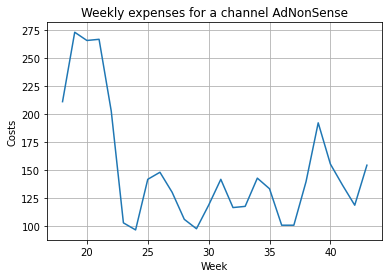

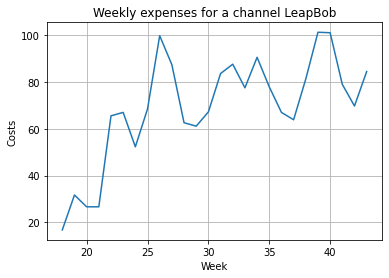

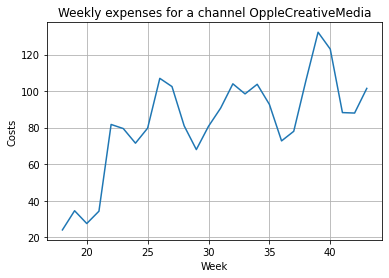

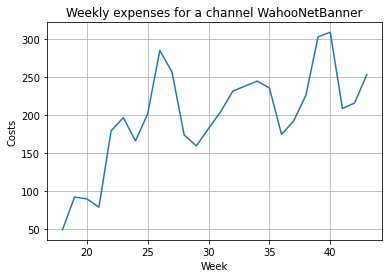

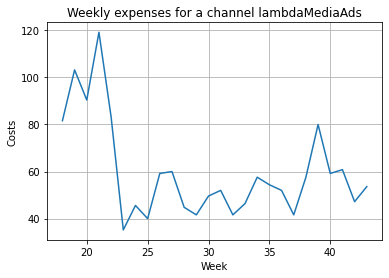

In [49]:
for channel in costs['channel'].unique():
    (
        costs.query('channel == @channel')
        .groupby('week')['costs'].sum()
        .plot(kind='line', grid=True,
              xlabel='Week', ylabel='Costs',
              title=f'Weekly expenses for a channel {channel}'
             )
    )
    
    plt.show()

Based on the obtained graphs, the following conclusions can be drawn regarding the platforms:
- the trend of increasing expenses week by week is observed in the following platforms:
   - FaceBoom,
   - TipTop,
   - OppleCreativeMedia,
   -LeapBob
   - WahooNetBanner;
- a trend towards lower costs week by week is observed among platforms:
   - MediaTornado,
   - RocketSuperAds,
   - AdNonSense,
   - YRabbit,
   - lambdaMediaAds.

Let's build graphs on a monthly basis.

<Axes: title={'center': 'Dynamics of expenses by month for various advertising channels'}, xlabel='Month', ylabel='Costs'>

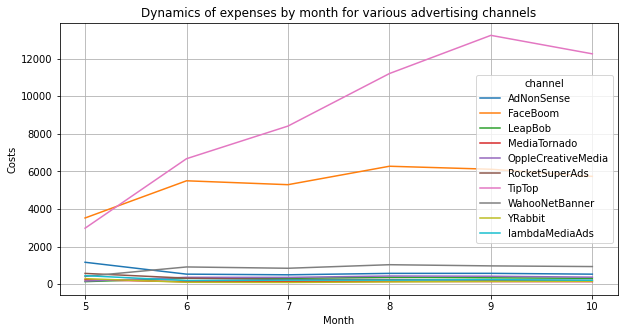

In [50]:
costs.pivot_table(
    index='month', columns='channel', values='costs', aggfunc='sum'
).plot(kind='line', figsize=(10, 5), grid=True,
       xlabel='Month', ylabel='Costs', rot=0,
       title='Dynamics of expenses by month for various advertising channels'
      )

On a monthly basis, there is also a tendency for expenses to increase; the leaders in terms of expenses are the same.

Consider each platform separately.

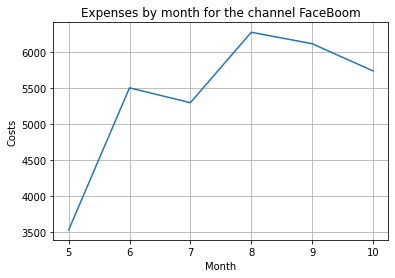

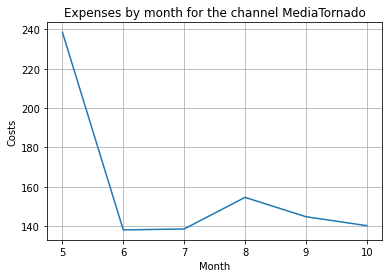

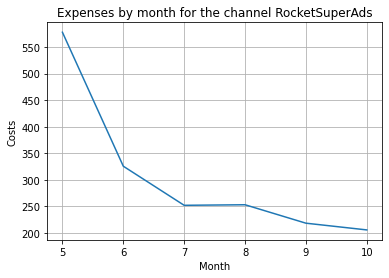

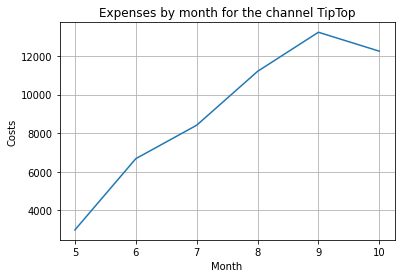

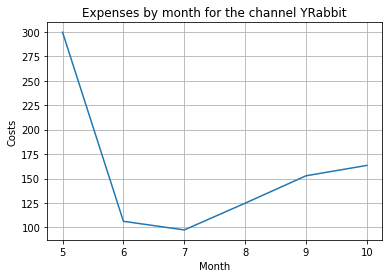

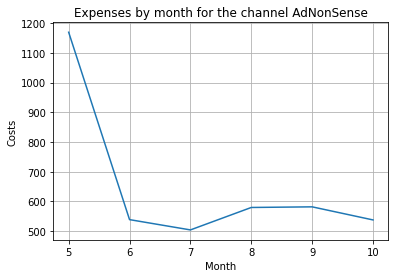

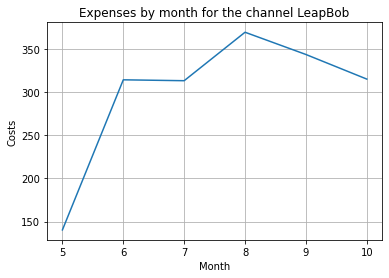

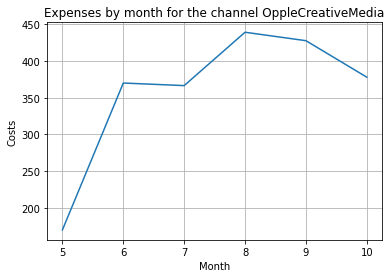

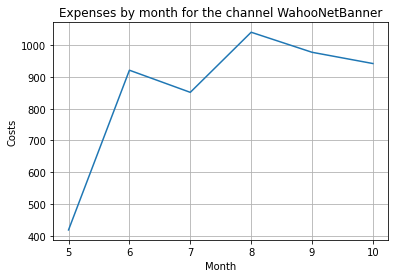

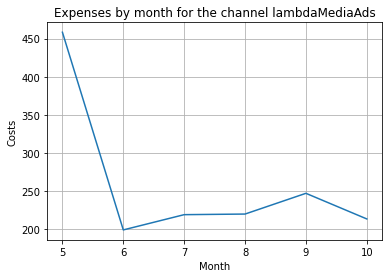

In [51]:
for channel in costs['channel'].unique():
    (
        costs.query('channel == @channel')
        .groupby('month')['costs'].sum()
        .plot(kind='line', grid=True,
              xlabel='Month', ylabel='Costs',
              title=f'Expenses by month for the channel {channel}'
             )
    )
    
    plt.show()

The trends towards growth or reduction in expenses on a monthly basis for advertising sources are the same as for weekly ones.

### Average cost of attracting a user through advertising channels

In [52]:
profiles.groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False)

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

From the list presented above, you can see that the most expensive attraction is the TipTop platform (2.8 conventional units), followed by the cost of the FaceBoom and AdNonSense platforms (about 1 conventional unit), the cheapest platforms in terms of attraction are YRabbit, MediaTornado, LeapBob (approximately 0.22 conventional units).

### Mini-output

In total, 105,497.3 conventional units were spent on marketing during the study period.

The biggest expenses come from the TipTop and FaceBoom platforms.

Marketing costs have been steadily increasing over time for the TipTop platform; expenses on the FaceBoom platform are slowly but increasing; the remaining platforms have stable costs over time.

The most expensive average cost of attracting a user are the platforms TipTop (2.8 conventional units), FaceBoom and AdNonSense (approximately 1 conventional unit).

## Advertising ROI assessment

In [53]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
profiles_without_organic = profiles.query('channel != "organic"')
profiles_without_organic['channel'].unique()

array(['FaceBoom', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

### LTV and ROI analysis

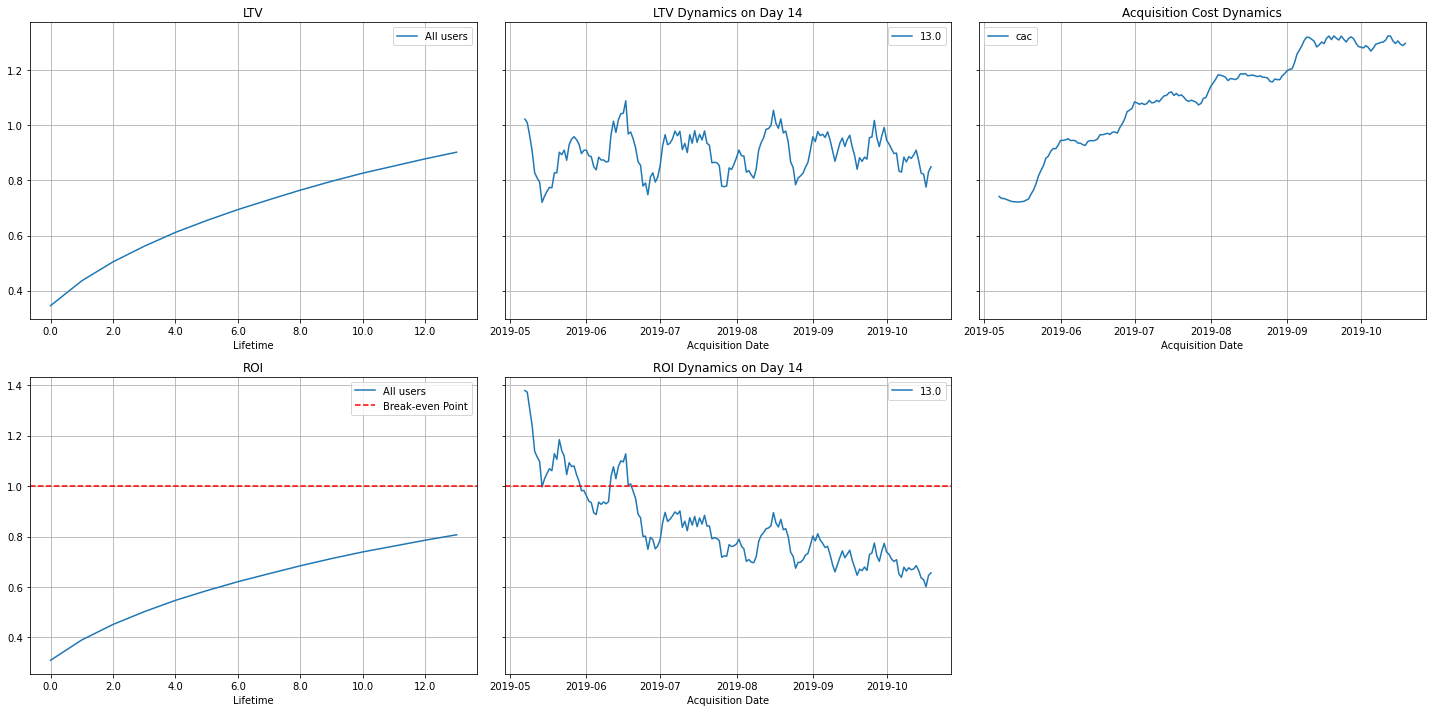

In [54]:
(
    ltv_df_raw,
    ltv,
    ltv_in_time,
    roi,
    roi_in_time
) = get_ltv(profiles_without_organic, orders, observation_date, horizon_days)
plot_ltv_roi(ltv, ltv_in_time, roi, roi_in_time, horizon_days)

From the obtained graphs we can draw the following conclusions:
- advertising does not pay off, at the end of 2 weeks the ROI does not reach 100%,
- the advertising budget is increased, and the ROI falls over time; at the end of July, the ROI turns out to be below the 100% line, it turns out that advertising ceases to generate the required income, clients,
- LTV is stable over time.

### Analysis of user conversion and retention

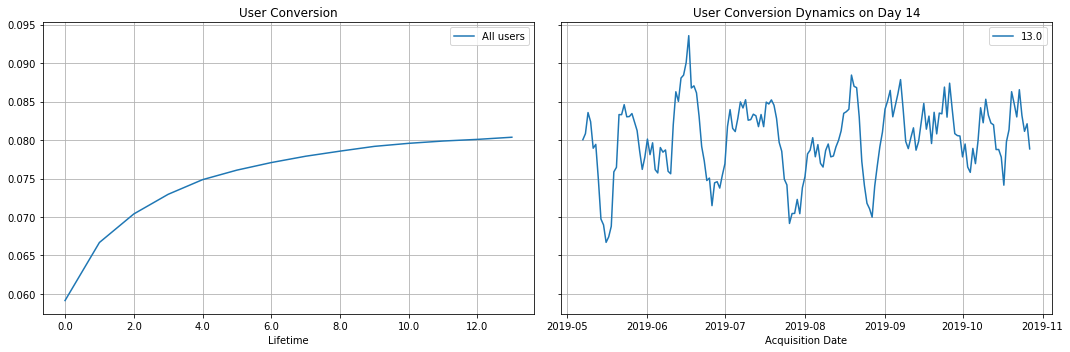

In [55]:
(
    conversion_raw,
    conversion,
    conversion_in_time
) = get_conversion(profiles_without_organic, orders, observation_date, horizon_days)
plot_conversion(conversion, conversion_in_time, horizon_days)

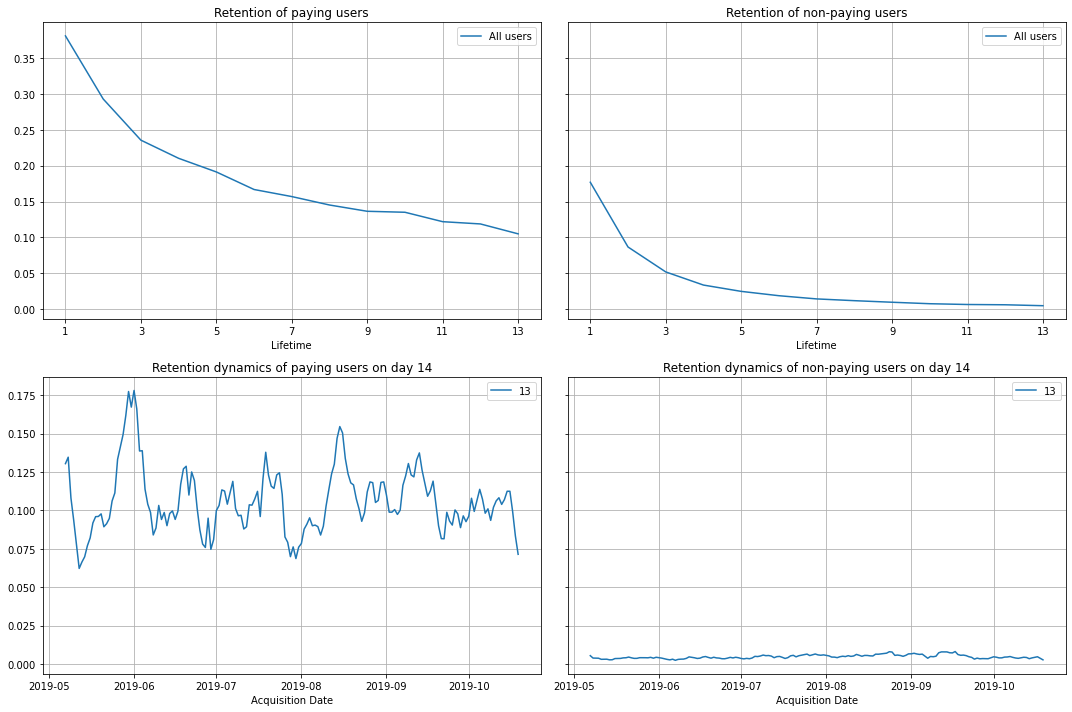

In [56]:
(
    retention_raw,
    retention,
    retention_in_time
) = get_retention(profiles_without_organic, visits, observation_date, horizon_days)
plot_retention(retention, retention_in_time, horizon_days)

Based on the obtained graphs, we can conclude that for all users:
- conversion at the end of the second week is about 8%,
- in dynamics, the conversion at the end of the second week averages 8%,
- retention at the end of the second week for paying users is about 10%,
- for non-payers about 0%,
- the dynamics are stable.

In general, there are no major changes in the quality of users.

### LTV and ROI analysis by device

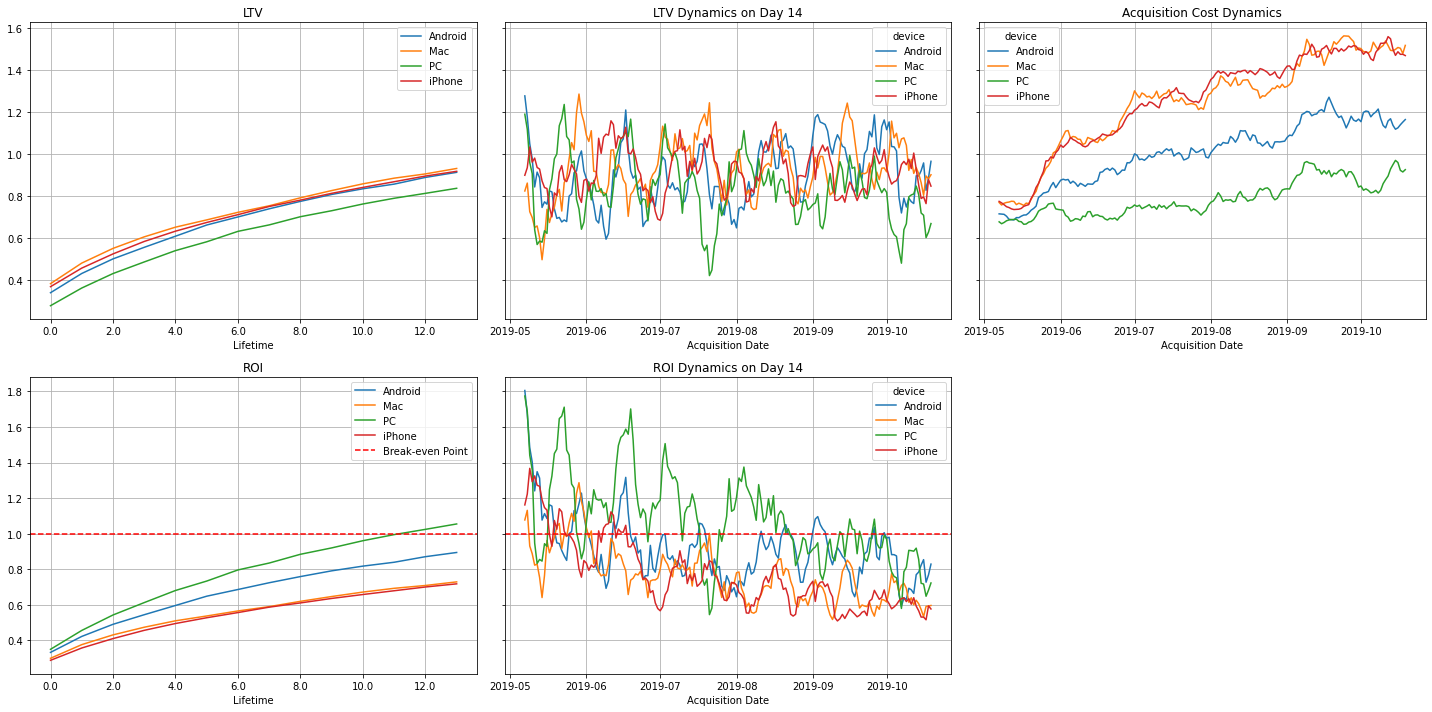

In [57]:
(
    ltv_df_raw,
    ltv,
    ltv_in_time,
    roi,
    roi_in_time
) = get_ltv(profiles_without_organic, orders, observation_date, horizon_days, dimensions=['device'])
plot_ltv_roi(ltv, ltv_in_time, roi, roi_in_time, horizon_days)

From the graphs you can see that the LTV of users of different devices does not differ much, except that PC users have a slightly lower value.

The cost of attracting users will vary greatly; iPhone and Mac users are considered the most expensive, which is why the ROI of these users does not pay off. While PC users are paying off, their ROI at the end of the second week is just over 100%.

The problem with poor ad ROI is likely not related to device type.

Let's also look at conversion and retention by device.

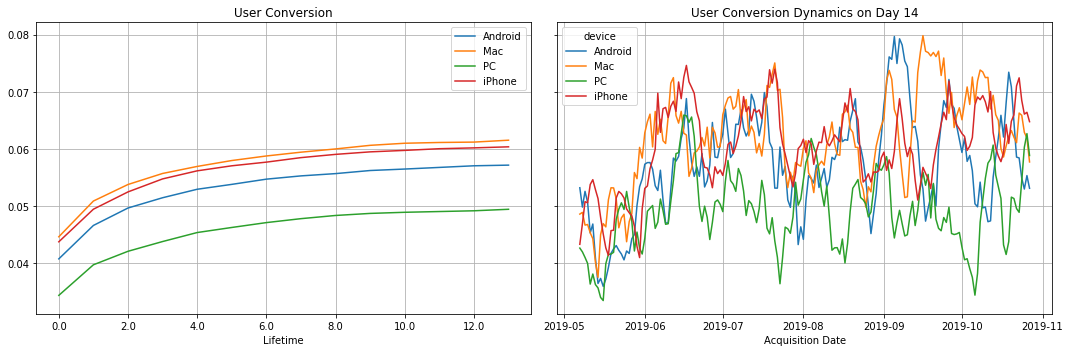

In [58]:
(
    conversion_raw,
    conversion,
    conversion_in_time
) = get_conversion(profiles, orders, observation_date, horizon_days, dimensions=['device'])
plot_conversion(conversion, conversion_in_time, horizon_days)

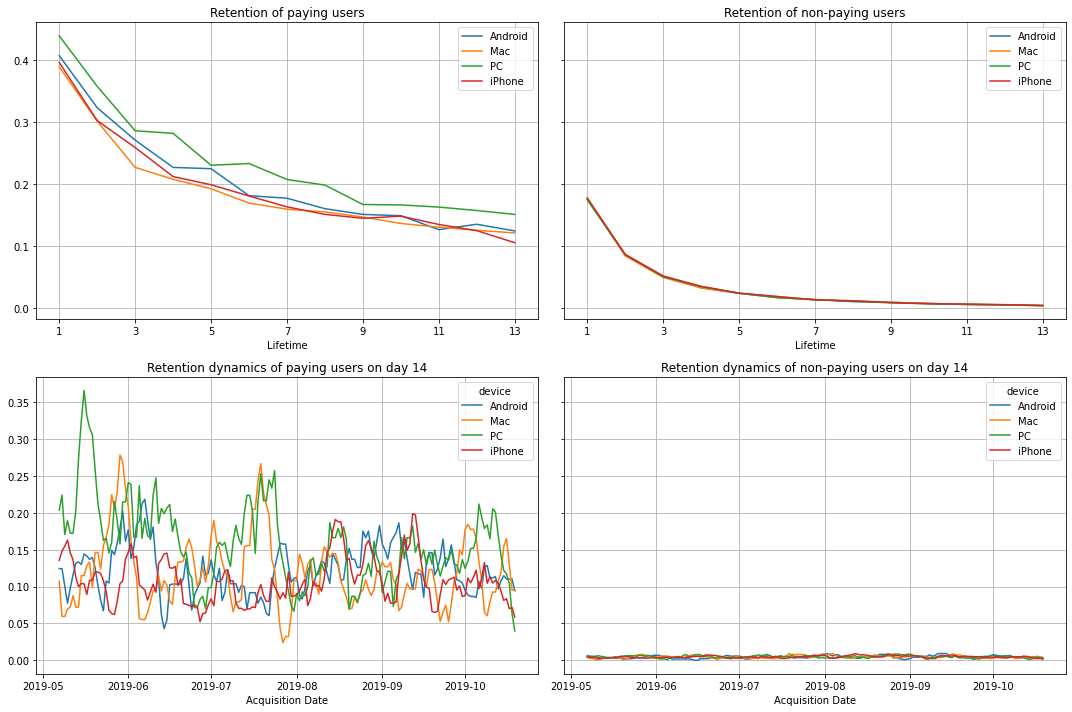

In [59]:
(
    retention_raw,
    retention,
    retention_in_time
) = get_retention(profiles, visits, observation_date, horizon_days, dimensions=['device'])
plot_retention(retention, retention_in_time, horizon_days)

We cannot draw unexpected new conclusions from the data, everything is stable and corresponds to the graph above with LTV, ROI, CAC.

### LTV and ROI analysis by country

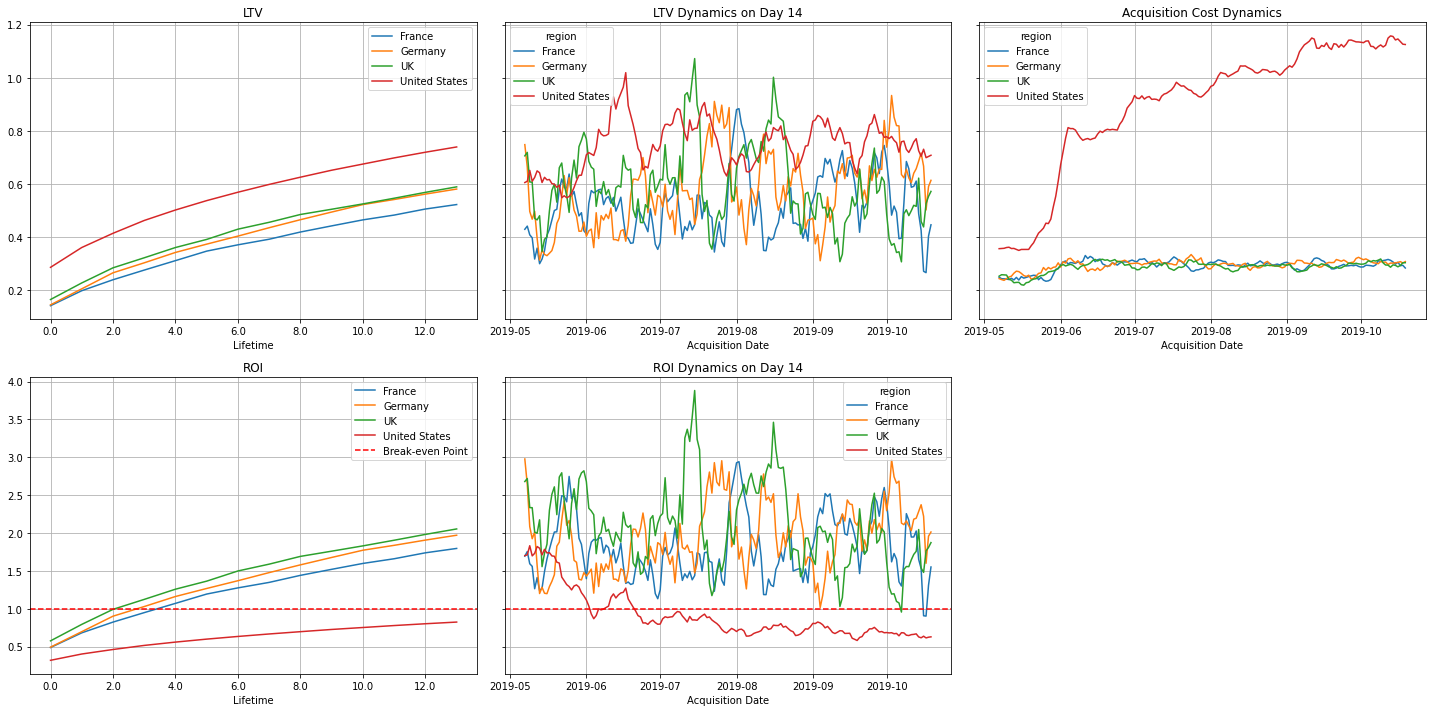

In [60]:
(
    ltv_df_raw,
    ltv,
    ltv_in_time,
    roi,
    roi_in_time
) = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=['region'])
plot_ltv_roi(ltv, ltv_in_time, roi, roi_in_time, horizon_days)

These graphs show clearly outlier values for users from America.

The LTV of users from America at the end of the 2nd week is approximately 0.75, while the LTV of users from other countries is on average 0.5, and the difference between the cost of these users is huge.

Over time, the CAC of users from America has increased, while the CAC of users from other countries has not changed much. The average difference between the cost of users from America and the cost of users from other countries is approximately 0.7!

ROI (investment) does not pay off for users from America, their maximum is 90%, while the ROI of other countries crosses the line at 150%. The ROI trend for American users is falling.

Since the majority of users on our platform are from the US, this is our main market that determines the ROI of advertising.

Let's look at conversion and retention by country.

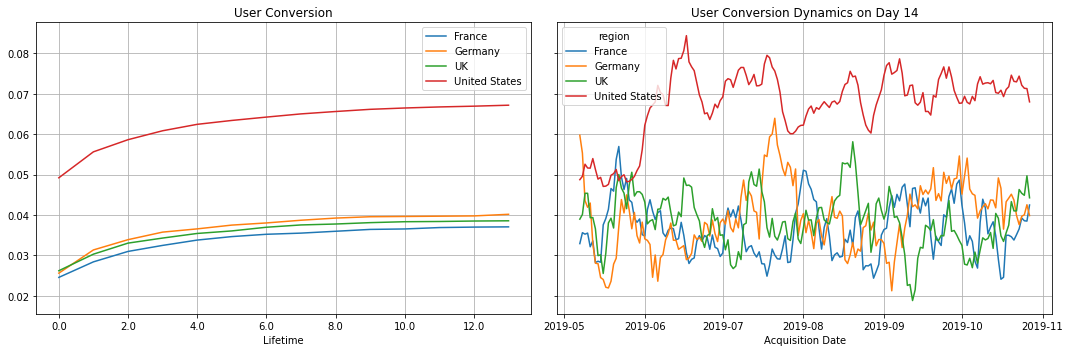

In [61]:
(
    conversion_raw,
    conversion,
    conversion_in_time
) = get_conversion(profiles, orders, observation_date, horizon_days, dimensions=['region'])
plot_conversion(conversion, conversion_in_time, horizon_days)

The conversion rate for American users is high (almost 7%).

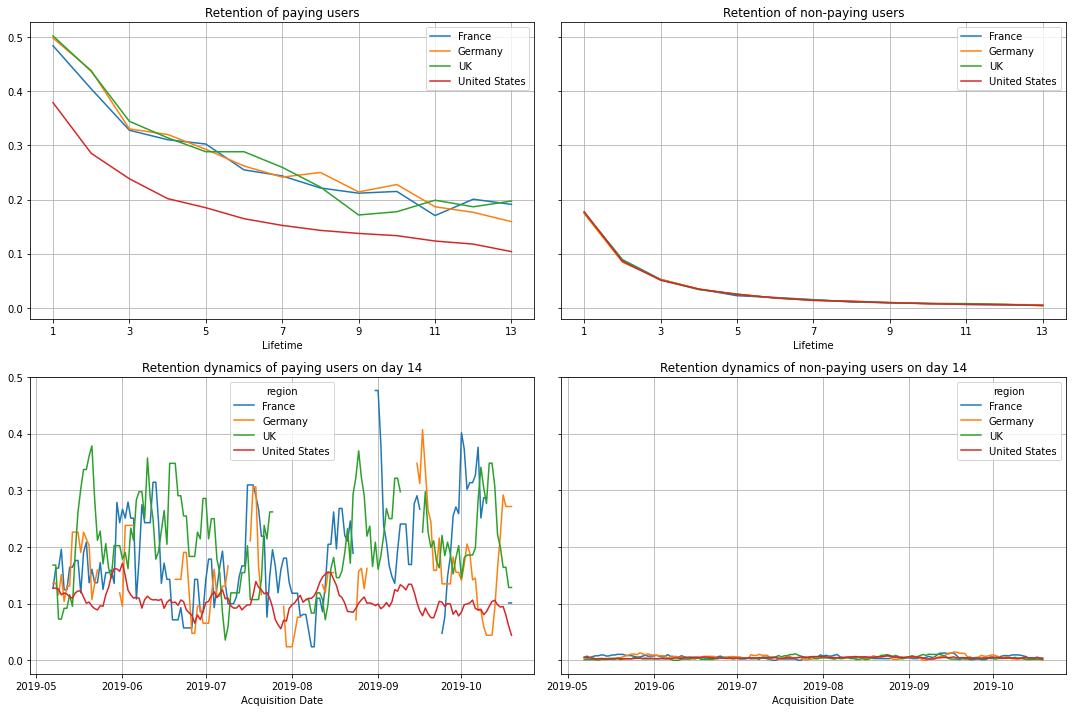

In [62]:
(
    retention_raw,
    retention,
    retention_in_time
) = get_retention(profiles, visits, observation_date, horizon_days, dimensions=['region'])
plot_retention(retention, retention_in_time, horizon_days)

But there are problems with retention; for some reason, users from America are retained worse than users from other countries.

### Analysis of LTV and ROI by advertising channel

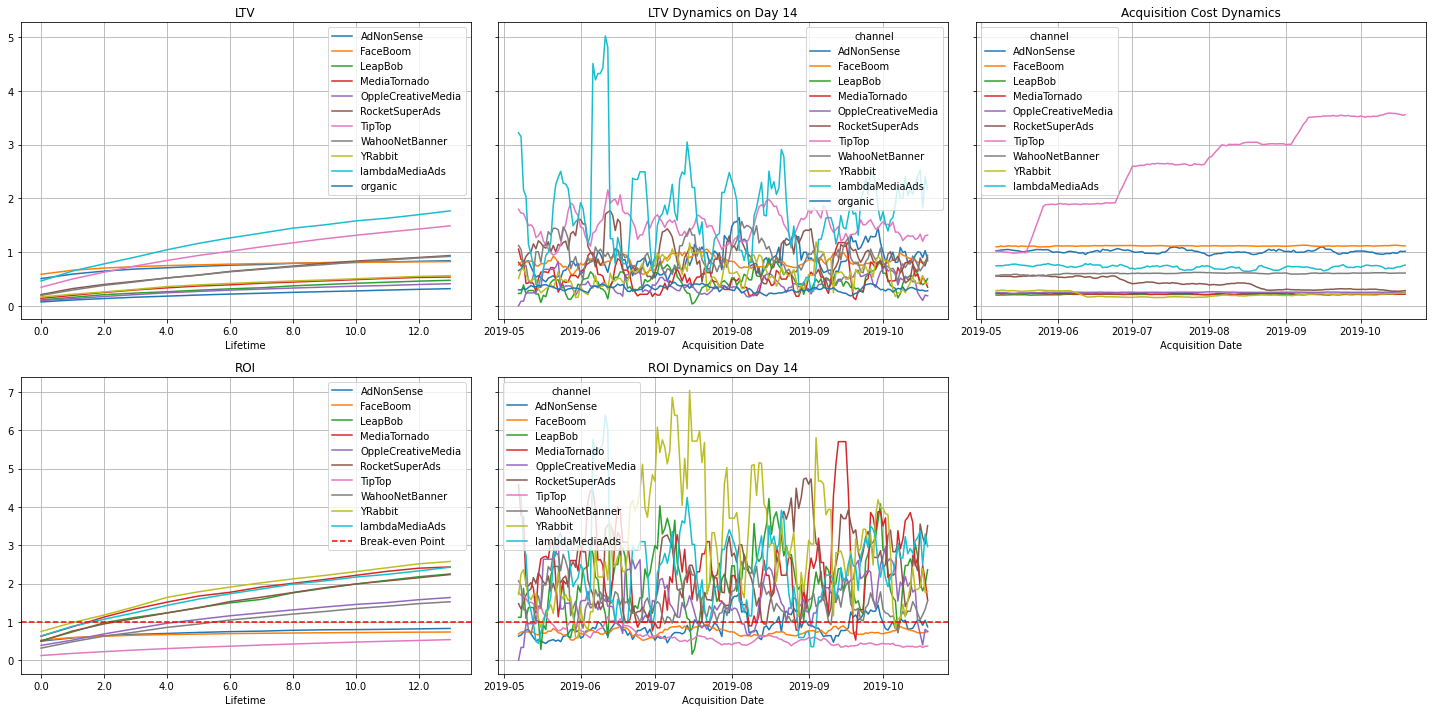

In [63]:
(
    ltv_df_raw,
    ltv,
    ltv_in_time,
    roi,
    roi_in_time
) = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=['channel'])
plot_ltv_roi(ltv, ltv_in_time, roi, roi_in_time, horizon_days)

In these graphs, only the graph of the cost of attracting users stands out clearly, where the TipTop platform stands out; the cost of attracting users grows over time, when the cost of attracting users of other platforms is quite static over time.

At the same time, the lambdaMediaAds platform takes first place in terms of LTV, and the TipTop platform takes second place. And here, according to the ROI chart, at the end of the 2nd week, users from the AdNonSense, FaceBoom and TipTop platforms do not reach the payback line.

Let's look at conversion and retention by source.

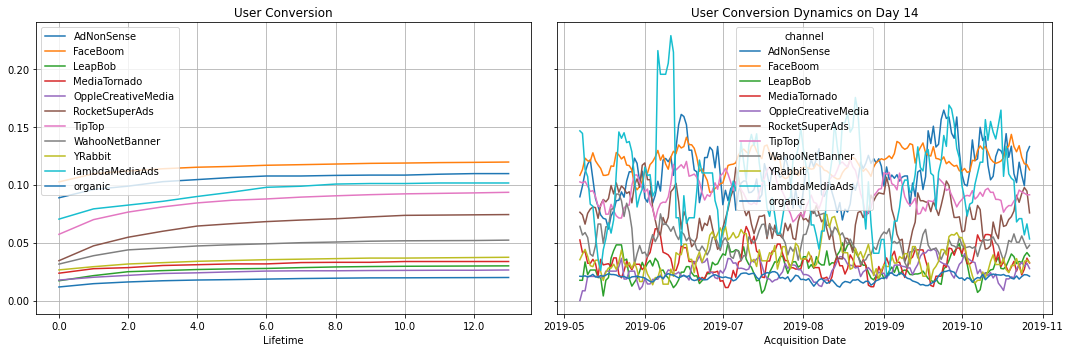

In [64]:
(
    conversion_raw,
    conversion,
    conversion_in_time
) = get_conversion(profiles, orders, observation_date, horizon_days, dimensions=['channel'])
plot_conversion(conversion, conversion_in_time, horizon_days)

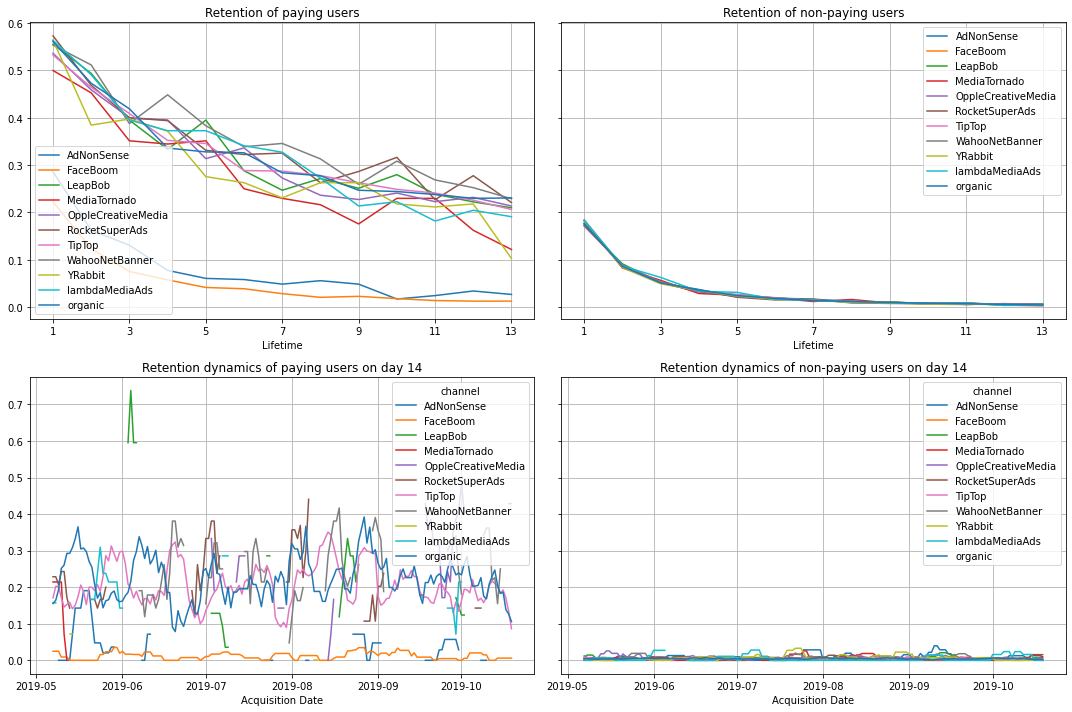

In [65]:
(
    retention_raw,
    retention,
    retention_in_time
) = get_retention(profiles, visits, observation_date, horizon_days, dimensions=['channel'])
plot_retention(retention, retention_in_time, horizon_days)

From the graphs above, we can see that the TipTop platform, which spends so much of the advertising budget, has the same retention as other platforms, and converts worse than some platforms that spend significantly less budget.

Also, on the graph of the retention of paying users, you can see that the AdNonSense and FaceBoom platforms have lower user retention than other advertising channels.

Let's look at conversion and retention by acquisition channel separately for US users.

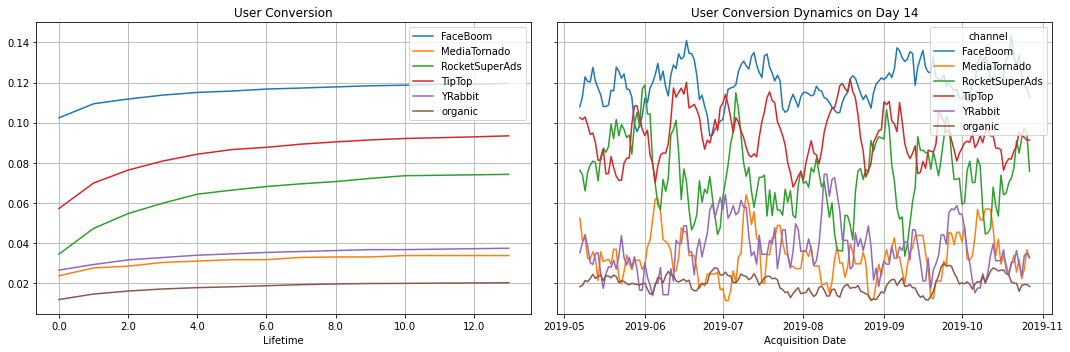

In [66]:
(
    conversion_raw,
    conversion,
    conversion_in_time
) = get_conversion(profiles.query('region == "United States"'), orders, observation_date, horizon_days, dimensions=['channel'])
plot_conversion(conversion, conversion_in_time, horizon_days)

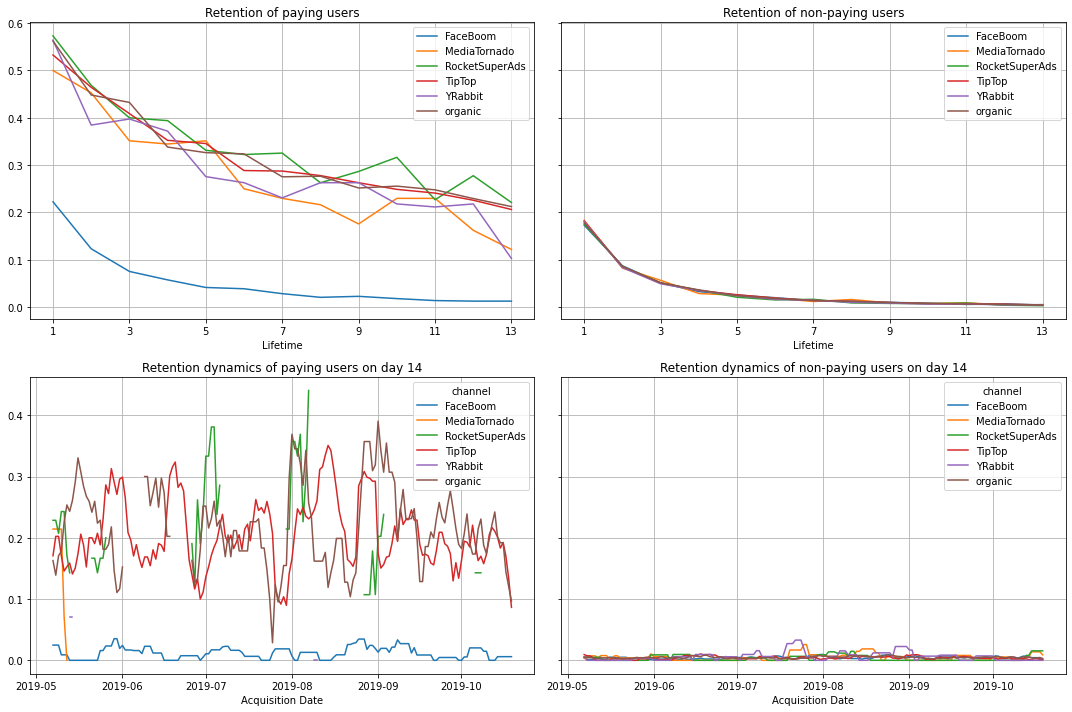

In [67]:
(
    retention_raw,
    retention,
    retention_in_time
) = get_retention(profiles.query('region == "United States"'), visits, observation_date, horizon_days, dimensions=['channel'])
plot_retention(retention, retention_in_time, horizon_days)

From the graphs above you can see that US users who come from the FaceBoom platform have very poor retention.

At the same time, the RocketSuperAds platform can be highlighted as a potential platform for investment, good retention and fairly good conversion.

### Mini-output

In general, advertising aimed at attracting users does not pay off.

The following may have a negative impact on payback:
- users from America attracted from FaceBoom, a lot of advertising money is spent on attracting them, but these users have very poor retention, although their conversion is good;
- TipTop advertising platform, since a lot of advertising budget goes to this platform, but its conversion, retention and LTV are not very different from other platforms;
- advertising platforms AdNonSense and FaceBoom, since they also spend more money than other platforms, but these platforms have poor retention (unknown why).

Problems for *users from America who came from FaceBoom* may be due to an incorrect advertising campaign carried out on the FaceBoom platform, perhaps it is not aimed at American people. **Tip:** study why users from America who came from FaceBoom have poor retention and fix it; perhaps you should also pay attention to users from other countries, since they also have good performance.

Problems with *AdNonSense and FaceBoom* platforms in retention may arise, as stated above, due to the peculiarities of advertising campaigns on these platforms. **Tip:** Find out why users from these platforms have worse retention than other platforms and fix it.

**Advice:** on the *TipTop* platform, it may not be worth investing so much money only in this platform, since it does not give the desired results; you can diversify the budget.

## General conclusion

**At the input** we had the entertainment app Procrastinate Pro+ and data on visits to this application by users acquired from May 1 to October 27, 2019, purchases by these users and advertising costs.

After downloading and studying the data, we passed it on to **pre-processing**, during which the following was done:
- the names of the columns have been corrected,
- column data types have also been corrected,
- tables were checked for duplicates.

Next, we **prepared the necessary functions for data analysis**. These are functions for calculating retention, conversion, LTV, CAC, ROI, as well as for visualizing these parameters.

After this, we began **exploratory analysis**, during which we found out:
- maximum date for attracting users - ```2019-10-27```;
- the minimum date for attracting users is ```2019-05-01```;
- most users are from America;
- a large share of paying users from America;
- Most users use iPhone;
- a large share of paying users use Mac;
- most users came from an organic source;
- a large share of paying users on the FaceBoom platform.

Next, we began **studying marketing expenses**, during which we found out:
- in total, 105,497.3 conventional units were spent on marketing during the study period;
- the most expenses are on the TipTop and FaceBoom platforms;
- marketing costs are constantly increasing over time for the TipTop platform;
- expenses on the FaceBoom platform are slowly but increasing;
- other platforms have stable costs over time;
- the most expensive average cost of attracting a user is for the platforms TipTop (2.8 conventional units), FaceBoom and AdNonSense (approximately 1 conventional unit).

Next, we moved on to **advertising payback analysis** and found out:
- in general, advertising aimed at attracting users does not pay off;
- the following have a negative impact on payback:
   - users from America attracted through the FaceBoom platform,
   - TipTop, FaceBoom and AdNonSense platforms.
  
**Recommendations:**
- review the spending of the advertising budget by platform, it is possible to identify more productive platforms (maybe lambddaMediaAds);
- for users from the USA, find out the reason why they have poor retention, especially users who came from the FaceBoom platform, and fix it;
- also for users from the USA, you can consider the RocketSuperAds platform as potentially profitable, since users from this platform have good retention and good conversion;
- it’s worth taking a closer look at users from other countries, they have good performance with small investments;
- study why the FaceBoom and AdNonSense platforms have lower retention than other platforms and fix it.